In [109]:
import numpy as np

from matplotlib import pyplot as plt
from asteroloc8.asteroloc8.prior import NuPrior
from scipy import stats
%matplotlib inline

In [11]:
tic261154649 = NuPrior(
    teff_spec=4947., teff_spec_err=92.,
    logg_spec=2.4565, logg_spec_err=0.05, 
    plx=1.44, plx_err=0.01, 
    jmag=8.293, jmag_err=0.03, 
    hmag=7.694, hmag_err=0.023, 
    kmag=7.559, kmag_err=0.027,
)

In [12]:
a = tic261154649.gaiascalnmx(mass='giants', N_samples=10000)
print('numax_50th = ', a[0][0])
print('numax_std = ', a[0][1])

numax_50th =  30.2634197751521
numax_std =  2.1158991472886965


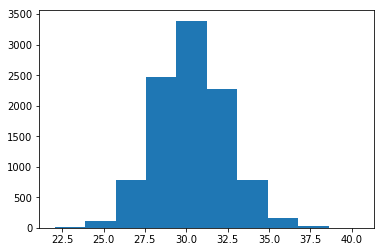

In [19]:
plt.hist(a[1]);

In [16]:
b = tic261154649.specnmx()
print('numax_50th = ', b[0][0])
print('numax_std = ', b[0][1])

numax_50th =  34.60036059574331
numax_std =  4.032902520357862


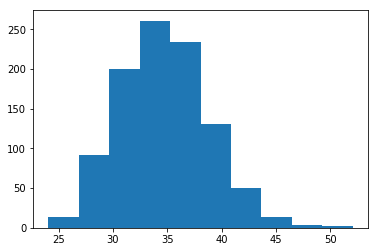

In [20]:
plt.hist(b[1]);

In [3]:
infile='DR16_APOTIC_NS_TMshort2.txt'

In [4]:
outfile = infile.replace('.txt','_out.txt')

In [27]:
stars=np.loadtxt(infile, usecols=(0,3,4,5,6,7,8,9,10,11,12,13,14,21,22), skiprows=1)

In [28]:
ids,ateff,atefferr,alogg,aloggerr, gparallax, gparallaxerr, tj, tjerr,th, therr,tk, tkerr, numax_bhm, numax_err_bhm=zip(*stars) 

In [23]:
open(outfile,'w').write('## TICID  specnumax  specnumaxerr gaianumax  gaianumaxerr \n')

59

In [24]:
for i in range(len(ids)):
    star=NuPrior(teff_spec=ateff[i], teff_spec_err=atefferr[i], logg_spec=alogg[i], logg_spec_err=aloggerr[i], plx=gparallax[i], plx_err=gparallaxerr[i], 
        jmag=tj[i], jmag_err=tjerr[i], hmag=th[i], hmag_err=therr[i], kmag=tk[i], kmag_err=tkerr[i])
 
    if gparallax[i] > 0:
        gaiastar=star.gaiascalnmx(mass='giants')
        gaianumaxstar=gaiastar[0][0]
        gaianumaxrangestar=gaiastar[0][1]
    else:
        gaianumaxstar=-9999
        gaianumaxrangestar=-9999

    if (ateff[i] > 0 and alogg[i] > -10):
        specstar=star.specnmx()
        specnumaxstar=specstar[0][0]
        specnumaxrangestar=specstar[0][1]
    else:
        specnumaxstar=-9999
        specnumaxrangestar=-9999   
        
    lin='   %.0f'%ids[i]+'\t'+'   %.6f'%specnumaxstar+'\t'+'   %.6f'%specnumaxrangestar+'\t'+'   %.6f'%gaianumaxstar+'\t'+'   %.6f'%gaianumaxrangestar+'\n'
    open(outfile,'a').write(lin)     

/Users/jzinn/packages/asteroloc8/asteroloc8/prior.py:219: RuntimeWarning: invalid value encountered in log10
  MK = Kmag-(5*np.log10(1000/parallax)-5)


In [79]:
# plot up how well measured numaxes agree with the predicted numaxes
tic, numax_spec, numax_err_spec, numax_gaia, numax_err_gaia = np.genfromtxt(outfile, skip_header=1, unpack=True)

/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in less
/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less
/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in greater
/Users/jzinn/envs/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in less
/Users/jzinn/envs/an

Text(31.5, 0.5, '(numax_spec - numax_obs)/uncertainty')

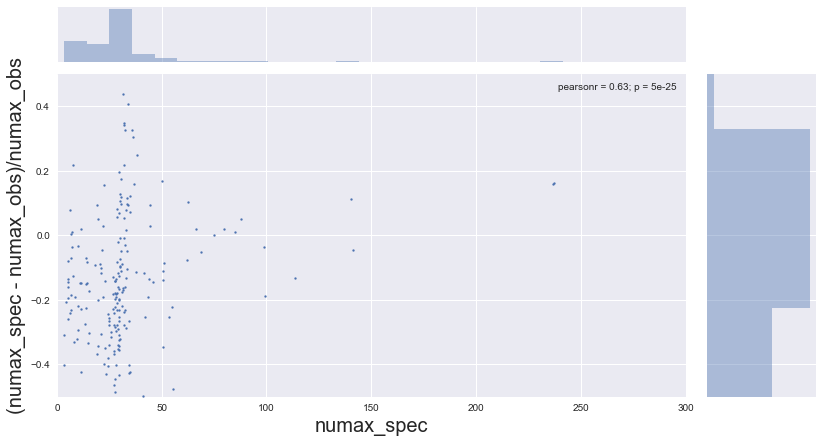

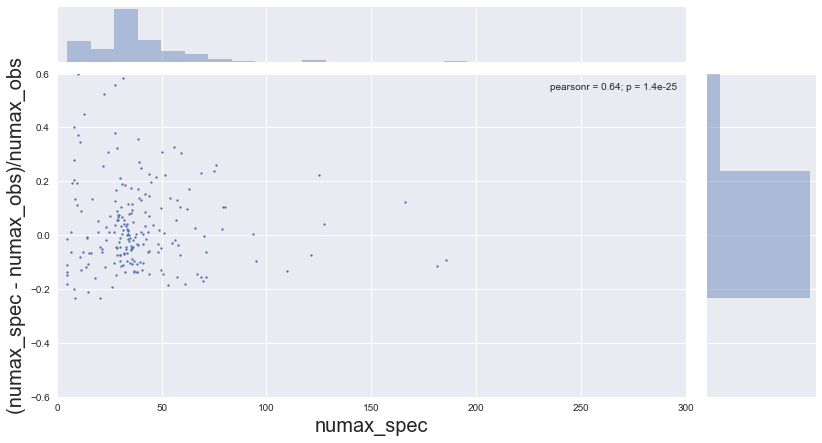

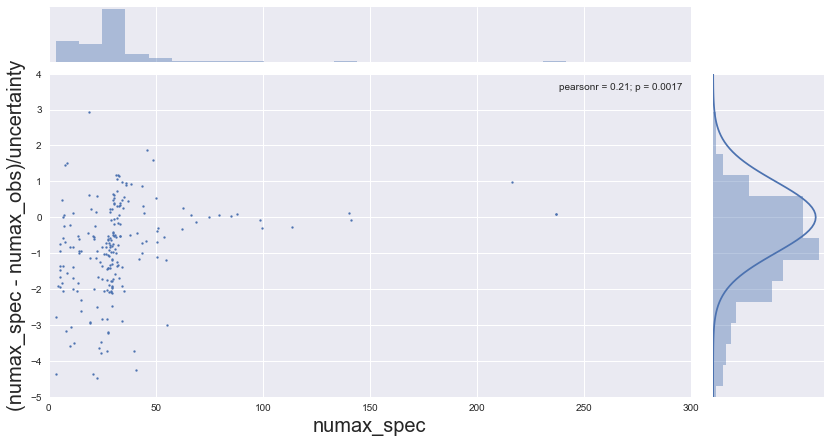

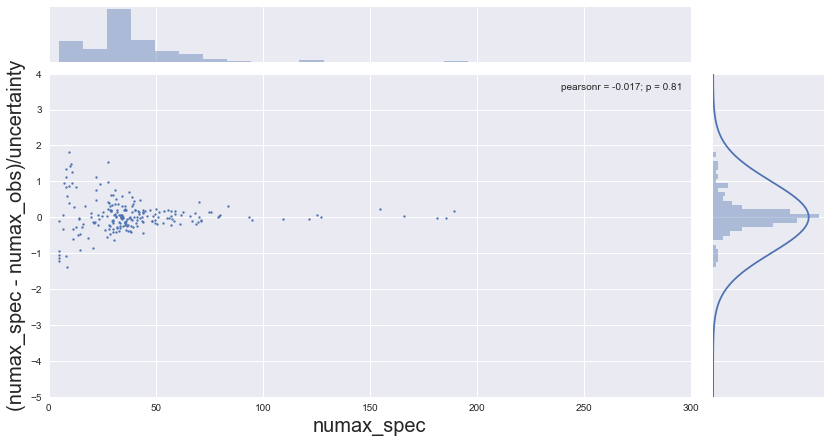

In [104]:
import seaborn as sb
gaia_numax = np.array(numax_gaia)
numax_err_bhm = np.array(numax_err_bhm)
numax_bhm = np.array(numax_bhm)
bad = np.logical_or(numax_err_bhm > 1e3, numax_bhm > 1e3)
bad = np.logical_or(numax_bhm < 0, bad)
bad = np.logical_or(numax_err_bhm < 0, bad)
bad = np.logical_or(numax_gaia > 1e3, bad)
bad = np.logical_or(numax_err_gaia > 1e3, bad)
bad = np.logical_or(numax_gaia < 0, bad)
bad = np.logical_or(numax_err_gaia < 0, bad)
numax_err_bhm[bad] = np.nan
numax_bhm[bad] = np.nan
numax_gaia[bad] = np.nan
numax_err_gaia[bad] = np.nan
numax_diff_norm = (numax_gaia - numax_bhm)/numax_bhm#np.sqrt((numax_err_gaia**2*0 + numax_err_bhm)**2)
#plt.hist(numax_bhm)
a = sb.jointplot(x=numax_gaia, y=numax_diff_norm,s=15, marker='.', xlim=[0,300],ylim=[-0.5, 0.5])
x = np.linspace(-5, 4, num=100)
a.fig.set_figwidth(12)
a.ax_joint.set_xlabel('numax_spec', fontsize=20)
a.ax_joint.set_ylabel('(numax_spec - numax_obs)/numax_obs', fontsize=20)
gaia_numax = np.array(numax_spec)
numax_err_bhm = np.array(numax_err_bhm)
numax_bhm = np.array(numax_bhm)


bad = np.logical_or(numax_err_bhm > 1e3, numax_bhm > 1e3)
bad = np.logical_or(numax_bhm < 0, bad)
bad = np.logical_or(numax_err_bhm < 0, bad)
bad = np.logical_or(numax_spec > 1e3, bad)
bad = np.logical_or(numax_err_spec > 1e3, bad)
bad = np.logical_or(numax_spec < 0, bad)
bad = np.logical_or(numax_err_spec < 0, bad)
numax_err_bhm[bad] = np.nan
numax_bhm[bad] = np.nan
numax_spec[bad] = np.nan
numax_err_spec[bad] = np.nan
numax_diff_norm = (numax_spec - numax_bhm)/numax_bhm#np.sqrt((numax_err_spec**2*0 + numax_err_bhm)**2)
#plt.hist(numax_bhm)
a = sb.jointplot(x=numax_spec, y=numax_diff_norm,s=15, marker='.', xlim=[0,300],ylim=[-0.6,0.6])
x = np.linspace(-5, 4, num=100)
a.fig.set_figwidth(12)
a.ax_joint.set_xlabel('numax_spec', fontsize=20)
a.ax_joint.set_ylabel('(numax_spec - numax_obs)/numax_obs', fontsize=20)



numax_diff_norm = (numax_gaia - numax_bhm)/np.sqrt((numax_err_gaia**2 + numax_err_bhm)**2)

a = sb.jointplot(x=numax_gaia, y=numax_diff_norm,s=15, marker='.', xlim=[0,300],ylim=[-5,4])
x = np.linspace(-5, 4, num=100)
a.ax_marg_y.plot(1./np.sqrt(np.pi*2.0)*np.exp(-x**2/2.0)*100,x)
a.fig.set_figwidth(12)
a.ax_joint.set_xlabel('numax_spec', fontsize=20)
a.ax_joint.set_ylabel('(numax_spec - numax_obs)/uncertainty', fontsize=20)

numax_diff_norm = (numax_spec - numax_bhm)/np.sqrt((numax_err_spec**2 + numax_err_bhm)**2)

a = sb.jointplot(x=numax_spec, y=numax_diff_norm,s=15, marker='.', xlim=[0,300],ylim=[-5,4])
x = np.linspace(-5, 4, num=100)
a.ax_marg_y.plot(1./np.sqrt(np.pi*2.0)*np.exp(-x**2/2.0)*100,x)
a.fig.set_figwidth(12)
a.ax_joint.set_xlabel('numax_spec', fontsize=20)
a.ax_joint.set_ylabel('(numax_spec - numax_obs)/uncertainty', fontsize=20)

In [32]:
print(numax_bhm)

(1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 34.4, 1e+20, 30.36, 1e+20, 1e+20, 1e+20, 1e+20, 33.56, 1e+20, 1e+20, 27.78, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, -9999.0, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 23.52, 1e+20, 1e+20, -9999.0, 1e+20, 35.04, 1e+20, 30.3, 1e+20, 1e+20, 1e+20, 52.1, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 31.97, 1e+20, 1e+20, 1e+20, 42.62, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 63.35, 1e+20, 6.54, -9999.0, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 55.66, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 81.29, 7.38, 1e+20, 1e+20, 1e+20, 53.67, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 19.37, -9999.0, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 1e+20, 50.54, 1e+20, 1e+20, 1e+20, 1e

In [113]:
def combine(*funcs):
    '''
    Combine numax priors based on any combination of the three methods:
        specnmx
        gaiascalnmx
        gaiamlnmx (not supported yet !!!)
    INPUTS:
    funcs : functions
     Up to three functions (e.g., combine(specnmx, gaiascalnmx)) whose pdfs are to be combined.
    OUTPUTS:
     pdf : scipy.stats.kde instance
    '''
    _, samples = funcs[0]()
    pdf = stats.gaussian_kde(samples)
    
    for func in funcs[1:]:
        print(func)
        _, samples = func()
        #pdf *= stats.gaussian_kde(samples)
    return pdf
combine(star.gaiascalnmx, star.specnmx)

<bound method NuPrior.specnmx of <asteroloc8.asteroloc8.prior.NuPrior object at 0x11c6777f0>>
